# Exercise 2

Work on this before the next lecture on 12 April. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to your GitHub repository for this course before the next lecture starts and post a link to your repository in [this thread](https://github.com/wildtreetech/advanced-computing-2018/issues/3). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

In [17]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

# Question 1

Build your own random forest classifier! Using the `DecisionTreeClassifier` from scikit-learn (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) construct your own `RandomForestClassifier`.

There are two methods for adding randomisation to the tree growing process:

* grow each tree on a bootstrap sample of the data
* configure each tree to select a subset of features for each split

Try out your new `RandomForestClassifier` on the https://archive.ics.uci.edu/ml/datasets/bank+marketing dataset.

**Note:** To test your classifier it is a good idea to use a smaller dataset like the `make_blobs` from the lecture. It will run much faster and be easier to debug.

* Can you show that a forest of trees that are all the same performs like a single decision tree?
* Can you compute the correlation coefficient between scores assigned by two different trees in the forest? In order to gain from buildign a forest you want your trees to not be 100% correlated. Experiment with the different randomisation strategies to check that they work.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [11]:
from tempfile import mkstemp
from sklearn.tree import export_graphviz
import subprocess
from IPython.core.display import HTML

def draw_tree(clf, feature_names, svg_name=None, **kwargs):
    _, name = mkstemp(suffix='.dot')
    if svg_name is None:
        _, svg_name = mkstemp(suffix='.svg')
    export_graphviz(clf, out_file=name,
                    feature_names=feature_names,
                    **kwargs)
    command = ["dot", "-Tsvg", name, "-o", svg_name]
    subprocess.check_call(command)
    return HTML(open(svg_name).read())

In [12]:
from sklearn.datasets import load_iris

data = load_iris()
print('This data set contains', len(data.target), 'samples.')
print('The target names are', list(data.target_names), 'and the features are', list(data.feature_names))

This data set contains 150 samples.
The target names are ['setosa', 'versicolor', 'virginica'] and the features are ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)

tree = DecisionTreeClassifier(max_leaf_nodes=15, max_depth=10, random_state=1).fit(X_train, y_train)

In [14]:
draw_tree(tree, data.feature_names)

In [15]:
#now that the tree is trained, make a prediction
print(tree.predict(X_test), y_test)
print('The accuracy of prediction of this tree is', tree.score(X_test, y_test)*100, "%.")

[0 0 0 0 1 1 1 0 1 1 2 1 1 2 1 0 0 2 0 1 2 1 1 0 2 0 0 1 2 1 0 1 2 2 0 1 2
 2] [0 0 0 0 1 1 1 0 1 2 2 2 1 2 1 0 0 2 0 1 2 1 1 0 2 0 0 1 2 1 0 1 2 2 0 1 2
 2]
The accuracy of prediction of this tree is 94.73684210526315 %.


In [16]:
#Now we will generate a forest of trees and each tree will be grown on a bootstrap sample of the data
from sklearn.utils import resample

averageScore = []

for j in range(1, 200):
    
    trees= []
    scores = []
    
    for i in range(j):
        X_resampled, y_resampled = resample(X_train, y_train)

        tree = DecisionTreeClassifier(max_leaf_nodes=15, max_depth=10, random_state=1).fit(X_resampled, y_resampled)
        trees.append(tree)
        tree.predict(X_test)
        scores.append(tree.score(X_test, y_test))

    averageScore.append(np.mean(scores))

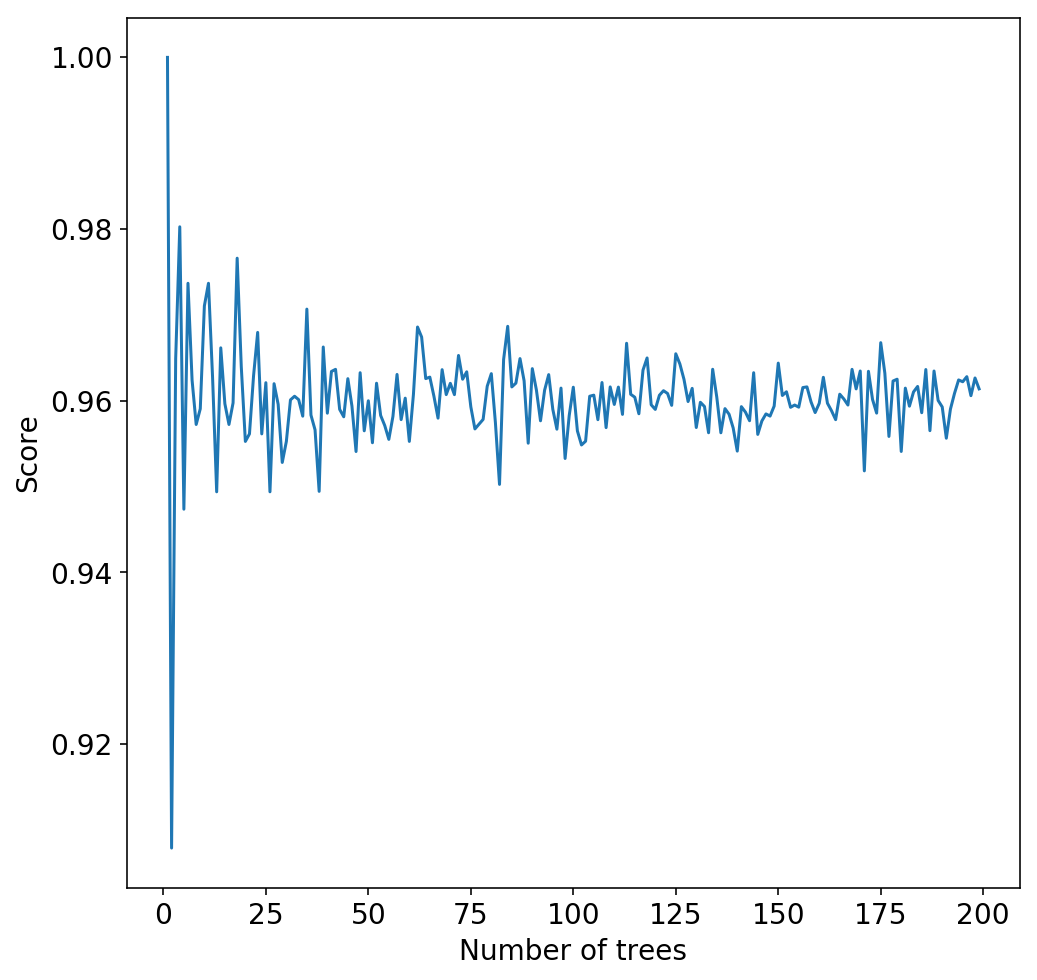

In [17]:
plt.plot(range(1,200), averageScore)
plt.xlabel('Number of trees')
plt.ylabel('Score')

In [18]:
#choosing 50 trees because seems stable after that
trees= []
scores = []
    
for i in range(50):
        X_resampled, y_resampled = resample(X_train, y_train)

        tree = DecisionTreeClassifier(max_leaf_nodes=15, max_depth=10, random_state=1).fit(X_resampled, y_resampled)
        trees.append(tree)
        tree.predict(X_test)
        scores.append(tree.score(X_test, y_test))

print('The accuracy of prediction with 50 trees is', np.mean(scores)*100, '%.')

The accuracy of prediction with 50 trees is 95.68421052631578 %.


In [19]:
# Now let's do the same but with always the same tree 
trees= []
scores = []
    
for i in range(50):
        X_resampled, y_resampled = resample(X_train, y_train)

        tree = DecisionTreeClassifier(max_leaf_nodes=15, max_depth=10, random_state=1).fit(X_train, y_train)
        trees.append(tree)
        tree.predict(X_test)
        scores.append(tree.score(X_test, y_test))

print('The accuracy of prediction with 50 trees is', np.mean(scores)*100, '%, which is the same as with 1 tree.')


The accuracy of prediction with 50 trees is 94.73684210526315 %, which is the same as with 1 tree.


In [20]:
#Let's show that it never changes
averageScore = []

for j in range(1, 200):
    
    trees= []
    scores = []
    
    for i in range(j):
        X_resampled, y_resampled = resample(X_train, y_train)

        tree = DecisionTreeClassifier(max_leaf_nodes=15, max_depth=10, random_state=1).fit(X_train, y_train)
        trees.append(tree)
        tree.predict(X_test)
        scores.append(tree.score(X_test, y_test))

    averageScore.append(np.mean(scores))

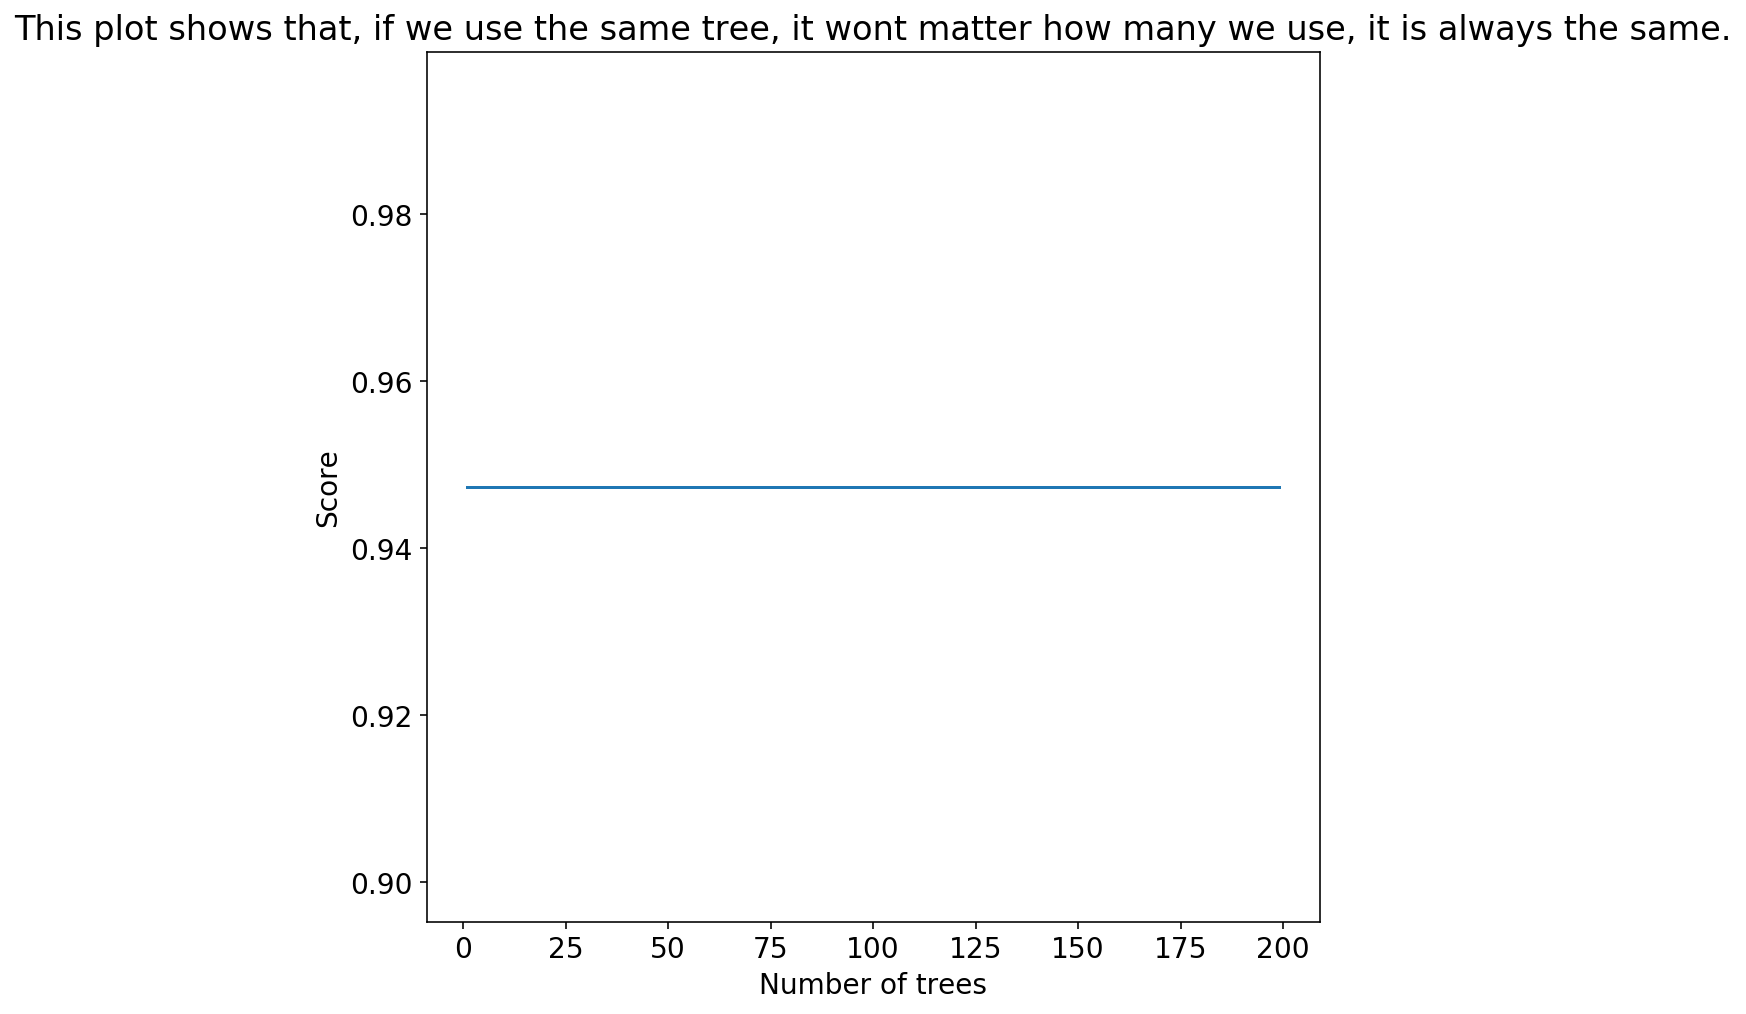

In [21]:
plt.plot(range(1,200), averageScore)
plt.xlabel('Number of trees')
plt.ylabel('Score')
plt.title('This plot shows that, if we use the same tree, it wont matter how many we use, it is always the same.')

In [22]:
#using the tree on the bank data
import pandas as pd

bankData = pd.read_csv\
('bank-additional/bank-additional.csv', \
 sep=';')

In [23]:
bankData[:5]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [24]:
bankData_cleaned = bankData[(bankData['housing'].str.contains("unknown") == False) * \
                            (bankData['default'].str.contains("unknown") == False) * \
                            (bankData['housing'].str.contains("unknown") == False)]

/home/stephanie/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [25]:
#Converting strings to encoded numbers

features = bankData_cleaned.columns.values

from sklearn.preprocessing import LabelEncoder

for feature in features:

    enc = LabelEncoder()
    enc.fit(bankData_cleaned[feature])
    bankData_cleaned[feature] = enc.transform(bankData_cleaned[feature])

/home/stephanie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [26]:
features = features[features != 'y']
X = bankData_cleaned[features]
y = bankData_cleaned['y']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0)

In [28]:
#choosing 50 trees because seems stable after that
trees= []
scores = []
    
for i in range(50):
        X_resampled, y_resampled = resample(X_train, y_train)

        tree = DecisionTreeClassifier(max_leaf_nodes=15, max_depth=10, random_state=1).fit(X_resampled, y_resampled)
        trees.append(tree)
        tree.predict(X_test)
        scores.append(tree.score(X_test, y_test))

print('The accuracy of prediction with 50 trees is', np.mean(scores)*100, '%.')

The accuracy of prediction with 50 trees is 89.50556242274415 %.


# Question 2

Use the ready made `RandomForestClassifier` from scikit-learn to create the best model you can for the Bank Marketing dataset. Use `GridSearchCV` (or any other method) to tune your model and possible pre-processing steps. Make sure you have a test set to use after you are done tuning to estimate your generalisation error.

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0)

In [31]:
#tunning the random forest

rfc=RandomForestClassifier()

p = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(RandomForestClassifier(), param_grid=p)
CV_rfc.fit(X_train, y_train)

print('Best parameters:', CV_rfc.best_params_)
print('Score with best parameters:', CV_rfc.best_estimator_.score(X_test, y_test))

Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 500}
Score with best parameters: 0.9035846724351051


# Question 3

Compare the feature importances calculated by a `RandomForestClassifier`, `ExtraTreesClassifier` and `GradientBoostedTreesClassifier` on the california housing dataset. You might have to tune `n_estimators` and other hyper-parameters to get good performance.

Plot each of the features as a scatter plot with the target to learn about each variable. You can also make a plot of two features and use the target as colour.

Fit a model and tune the model complexity using a training and test data set.

Explore the feature importances and partial dependences that are important to the house price.

In [1]:
from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

cal_housing = fetch_california_housing()

# if the above doesn't work, download `cal_housing_py3.pkl` from the GitHub repository
# and adjust the path to the downloaded file which is passed to `load()`
# uncomment the following lines
#from sklearn.externals.joblib import load
#d = load('/home/username/Downloads/cal_housing_py3.pkz')
#X, y = d[:,1:], d[:,0]/100000
#X[:, 2] /= X[:, 5]
#X[:, 3] /= X[:, 5]
#X[:, 5] = X[:, 4] / X[:, 5]

print(cal_housing['DESCR'])

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [2]:
print('This data set contains', len(cal_housing.target), 'samples.')
print('The feature names are', list(cal_housing.feature_names))

This data set contains 20640 samples.
The feature names are ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
from sklearn.model_selection import train_test_split
X = cal_housing.data
y= cal_housing.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y)

In [10]:
import numpy as np

regressor = RandomForestRegressor()

p = { 
    'n_estimators': np.arange(10, 150, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
    }

CV_rgr = GridSearchCV(regressor, param_grid=p)
CV_rgr.fit(X_train, y_train)
CV_rgr.predict(X_test)
rgr_best = CV_rgr.best_estimator_
print('Using regressor:', CV_rgr.__class__.__name__)
print('Best paramaters:', CV_rgr.best_params_)
print('Score with best parameters:', rgr_best.score(X_test, y_test))
randomForestBestEstim = rgr_best

Using regressor: GridSearchCV
Best paramaters: {'max_depth': 8, 'max_features': 'log2', 'n_estimators': 120}
Score with best parameters: 0.7610777717687043


In [12]:
regressor = ExtraTreesRegressor()

p = { 
    'n_estimators': np.arange(10, 150, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
    }

CV_rgr = GridSearchCV(regressor, param_grid=p)
CV_rgr.fit(X_train, y_train)
CV_rgr.predict(X_test)
rgr_best = CV_rgr.best_estimator_
print('Using regressor:', CV_rgr.__class__.__name__)
print('Best paramaters:', CV_rgr.best_params_)
print('Score with best parameters:', rgr_best.score(X_test, y_test))
extraTreesBestEstim = rgr_best


Using regressor: GridSearchCV
Best paramaters: {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 60}
Score with best parameters: 0.6428719726116967


In [13]:
p = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'max_depth' : [4,5,6,7,8],
}

rgr = GradientBoostingRegressor(n_estimators=500)

CV_rgr = GridSearchCV(rgr, param_grid=p)
CV_rgr.fit(X_train, y_train)
CV_rgr.predict(X_test)
#score = CV_rfc.scores(X_test, y_test)
rgr_best = CV_rgr.best_estimator_

print('Using regressor:', CV_rgr.__class__.__name__)
print('Best parameters:', CV_rgr.best_params_)
print('Score with best parameters:', CV_rgr.best_estimator_.score(X_test, y_test))

gradientBoostingBestEstim = rgr_best

Using regressor: GridSearchCV
Best parameters: {'learning_rate': 0.05, 'max_depth': 8, 'max_features': 'log2'}
Score with best parameters: 0.8537078239694655


In [14]:
def createDict(rgr):
    d = {'MedInc': [rgr.feature_importances_[0]], 'HouseAge': [rgr.feature_importances_[1]], 'AveRooms':\
    [rgr.feature_importances_[2]], 'AveBedrms': [rgr.feature_importances_[3]], 'Population': [rgr.feature_importances_[4]]\
     , 'AveOccup': [rgr.feature_importances_[5]], 'Latitude': [rgr.feature_importances_[6]], \
     'Longitude': [rgr.feature_importances_[7]]}
    return d

In [15]:
rf_feature_importance = createDict(randomForestBestEstim)
list(rf_feature_importance.keys())

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

(-0.35, 8.35)


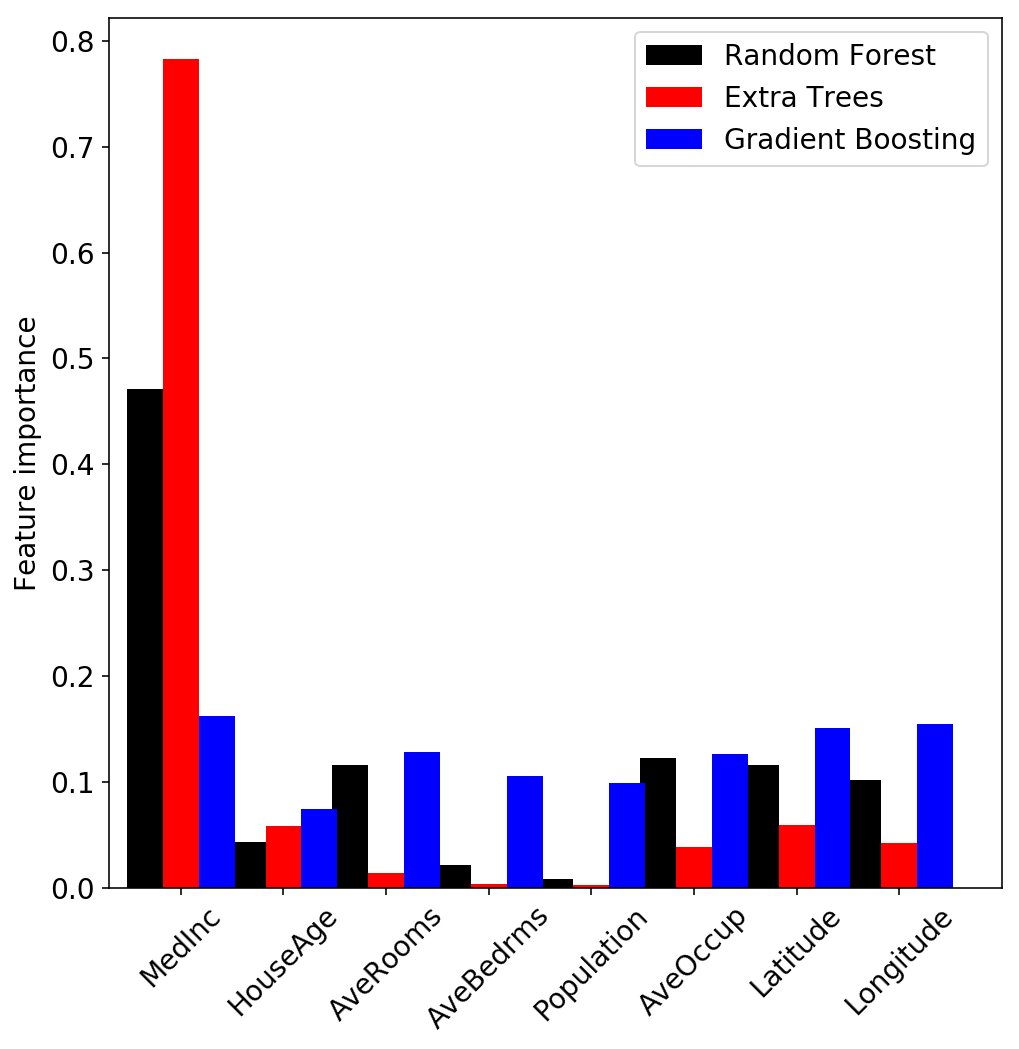

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

N=len(randomForestBestEstim.feature_importances_)

ind = np.arange(N)      
width = 0.35                      

## the bars
rects1 = ax.bar(ind, randomForestBestEstim.feature_importances_, width,
                color='black', label='Random Forest')

rects2 = ax.bar(ind+width, extraTreesBestEstim.feature_importances_, width,
                    color='red', label ='Extra Trees')

rects3 = ax.bar(ind+2*width, gradientBoostingBestEstim.feature_importances_, width,
                    color='blue', label='Gradient Boosting')

ax.set_xlim(-width,len(ind)+width)
print(ax.set_xlim(-width,len(ind)+width))
ax.set_ylabel('Feature importance')

xTickMarks = list(rf_feature_importance.keys())
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=14)

ax.legend()
plt.show()

We see that the most important feature for the random forest and the extra trees is medinc. The importance of features is almost constant for the gradient boosting.  

# Question 4

Competition time! Use any model you want (and understand) to make the best model you can to predict the target in the below dataset.

Each student's submission will be ranked by:
* their performance (using [AUC ROC](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) as metric) and
* how well they did at predicting their generalisation error.

Your final rank will be the average of your two ranks.

To evaluate how good you did at predicting your generalisation error Tim will release a fresh test data set after the hand-in deadline. You can then re-run your trained classifier on that data and score its performance. We will rank students by the difference between that score and their predicted score.

You can read in the data using the `pandas` library. The final column of the file contains the target (zero or one).

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

# you might have to adjust the path to the dataset
df_train = pd.read_csv("../../advanced-computing-2018/data/challenge-train.csv", header=None)
df_train = df_train.drop([46], axis=1)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,47,48
0,0.000576,0.999939,12.769232,0.584357,0.136273,13.359463,3.358099,14655.587891,0.005370,0.041032,...,376.700348,58935.695312,74241.648438,4598.116699,2.897916,2.932629,3.193417,267,0.381424,0
1,0.001807,0.999996,18.585171,0.368892,0.054991,3.600483,6.781577,4145.290527,0.030382,0.034570,...,2028.605591,20553.839844,12501.964844,28162.607422,3.584545,3.010242,3.322494,128,0.781520,1
2,0.000858,0.999304,4.794842,0.149876,0.172385,16.130068,3.723242,4936.734375,0.017344,0.027622,...,2874.089600,7566.020020,11801.971680,16086.186523,2.700943,2.920070,2.407294,254,0.508650,0
3,0.001519,0.999969,15.656528,0.312301,0.125831,8.113082,5.763765,4948.376465,0.035185,0.038973,...,1488.869995,19161.880859,18598.472656,17658.548828,3.108439,2.932674,3.164568,531,0.682114,0
4,0.000936,0.999978,8.998086,0.475861,0.065347,3.863127,3.675261,4757.155762,0.022795,0.046165,...,342.455688,12651.365234,33099.660156,10722.979492,2.873017,3.074762,4.136894,160,0.633693,1


In [28]:
# convert the pandas dataframe to a numpy array
# make sure you do not include the final column
# in your training data (X) but store it as target (y)
X = df_train.as_matrix()[:, :-1]
y = df_train.as_matrix()[:, -1]

In [29]:
X.shape

(45000, 47)

In [30]:
y.shape

(45000,)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3)

/home/stephanie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
p = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'max_depth' : [4,5,6,7,8],
}

clf = GradientBoostingClassifier(n_estimators=3000)

CV_clf = GridSearchCV(clf, param_grid=p)

CV_clf.fit(X_train, y_train)
CV_clf.predict(X_test)

best_clf = CV_clf.best_estimator_

y_sol = best_clf.predict(X_test)

print('Best params:', CV_clf.best_params_) 
print('Accuracy:', best_clf.score(X_test, y_test))   
print('AUC ROC score', roc_auc_score(y_test, y_sol))

Best params: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'log2'}
Accuracy: 0.910380952381
AUC ROC score 0.902998700014


In [33]:
#testing classifier

df_test = pd.read_csv("../../advanced-computing-2018/data/challenge-test.csv", header=None)
df_test = df_test.drop([46], axis=1)
X = df_test.as_matrix()[:, :-1]
y = df_test.as_matrix()[:, -1]

In [35]:
#best parameters

final_clf = GradientBoostingClassifier(n_estimators=3000, max_features='log2', learning_rate=0.05, max_depth = 4)
final_clf.fit(X_train, y_train)
acc_score = final_clf.score(X, y)
pred = final_clf.predict(X)
roc = roc_auc_score(y, pred)

In [42]:
print('The final scores are:')
print('Accuracy:', acc_score)
print('AUC ROC score', roc)

The final scores are:
Accuracy: 0.9102115017957699
AUC ROC score 0.9030832773865136
